In [ ]:

!pip install opencv-python-headless matplotlib numpy


In [ ]:
import cv2
print(cv2.__version__)


In [7]:
import os
print(os.listdir())


['.config', 'citra4.jpg', 'citra13.jpg', 'citra12.jpg', 'sample_data']


In [9]:
from PIL import Image
import numpy as np

img_pil = Image.open('citra4.jpg').convert('RGB')
img = np.array(img_pil)
print(type(img), img.shape)


<class 'numpy.ndarray'> (130, 150, 3)


#Deteksi Pembuluh Darah Citra Fundus pada Central Retinal Artery Occlusion

<class 'numpy.ndarray'> (130, 150, 3) uint8


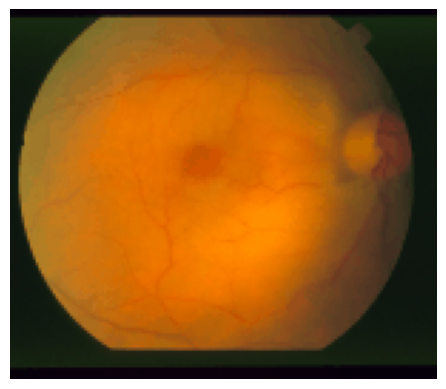

In [11]:
from PIL import Image
import numpy as np

img_pil = Image.open('citra4.jpg').convert('RGB')
img = np.array(img_pil)  # pastikan ini jadi numpy.ndarray
print(type(img), img.shape, img.dtype)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


TAHAP 1: Membuka gambar dan ekstraksi green channel...


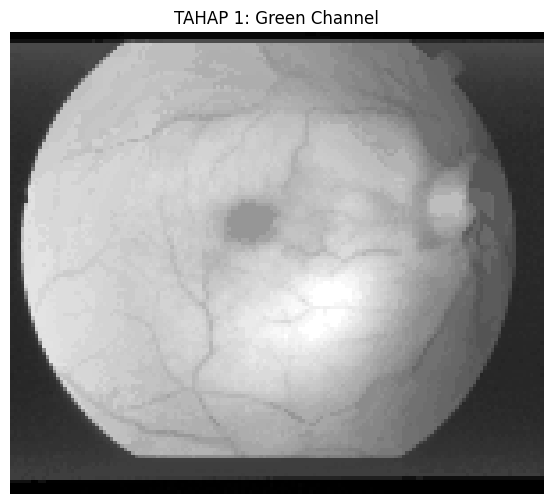

- Ukuran gambar: (130, 150)
- Range intensitas: 0 - 143
- Mean intensitas: 79.52


In [38]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("TAHAP 1: Membuka gambar dan ekstraksi green channel...")

pil_img = Image.open("citra4.jpg").convert("RGB")
img = np.array(pil_img)
green = img[:, :, 1]

# Tampilkan
plt.figure(figsize=(8, 6))
plt.imshow(green, cmap='gray')
plt.title("TAHAP 1: Green Channel")
plt.axis('off')
plt.show()

print(f"- Ukuran gambar: {green.shape}")
print(f"- Range intensitas: {green.min()} - {green.max()}")
print(f"- Mean intensitas: {green.mean():.2f}")

TAHAP 2: Menerapkan CLAHE untuk perbaikan kontras lokal...


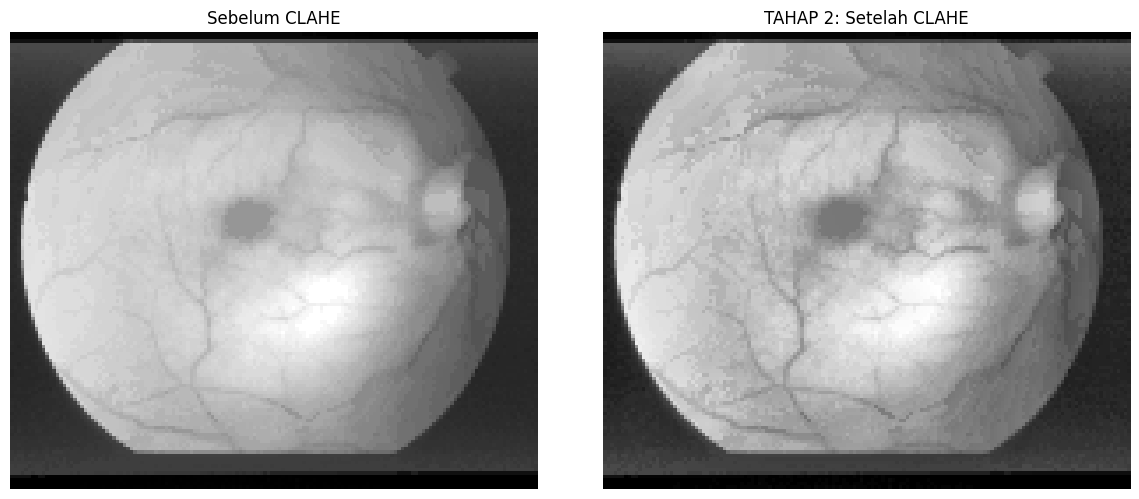

- Range intensitas setelah CLAHE: 3 - 160
- Mean intensitas setelah CLAHE: 87.17


In [39]:
print("TAHAP 2: Menerapkan CLAHE untuk perbaikan kontras lokal...")

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(green)

# Tampilkan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(green, cmap='gray')
plt.title("Sebelum CLAHE")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("TAHAP 2: Setelah CLAHE")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"- Range intensitas setelah CLAHE: {clahe_img.min()} - {clahe_img.max()}")
print(f"- Mean intensitas setelah CLAHE: {clahe_img.mean():.2f}")

TAHAP 3: Menerapkan enhancement kontras global...


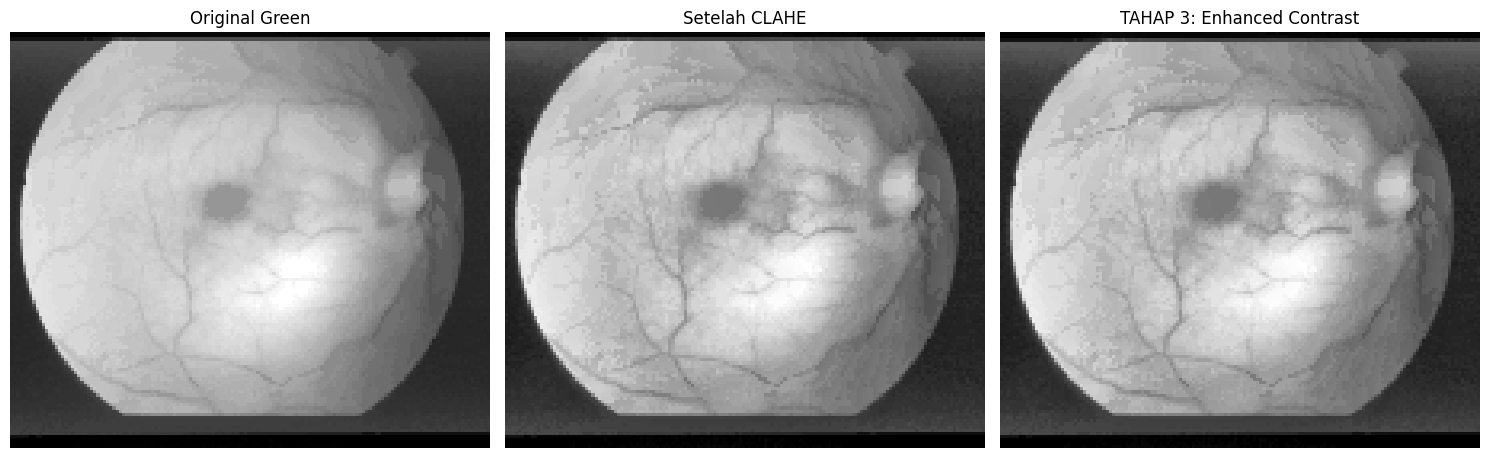

- Alpha (contrast): 1.5
- Beta (brightness): 0
- Range intensitas setelah enhancement: 4 - 240
- Mean intensitas setelah enhancement: 130.74


In [40]:
print("TAHAP 3: Menerapkan enhancement kontras global...")

sharpened = cv2.convertScaleAbs(clahe_img, alpha=1.5, beta=0)

# Tampilkan hasil tahap 3
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(green, cmap='gray')
plt.title("Original Green")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("Setelah CLAHE")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("TAHAP 3: Enhanced Contrast")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"- Alpha (contrast): 1.5")
print(f"- Beta (brightness): 0")
print(f"- Range intensitas setelah enhancement: {sharpened.min()} - {sharpened.max()}")
print(f"- Mean intensitas setelah enhancement: {sharpened.mean():.2f}")

TAHAP 4: Menerapkan Standard Canny Edge Detection...


(np.float64(-0.5), np.float64(149.5), np.float64(129.5), np.float64(-0.5))

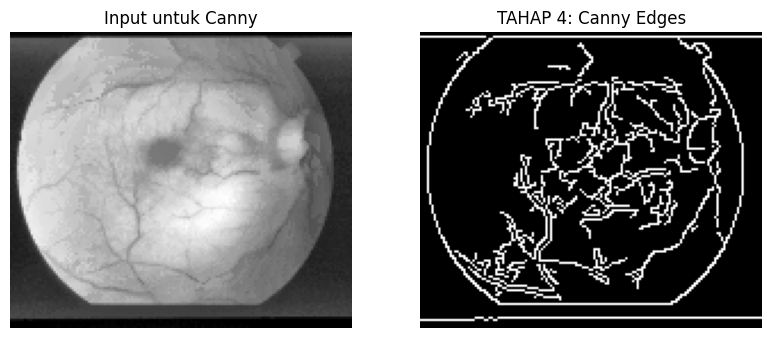

In [41]:
print("TAHAP 4: Menerapkan Standard Canny Edge Detection...")

canny_edges = cv2.Canny(sharpened, 50, 150)

# Tampilkan hasil tahap 4
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(sharpened, cmap='gray')
plt.title("Input untuk Canny")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title("TAHAP 4: Canny Edges")
plt.axis('off')

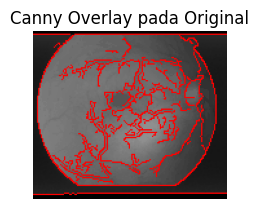

- Low threshold: 50
- High threshold: 150
- Jumlah pixel edge: 2418
- Persentase edge: 12.40%


In [42]:
overlay = cv2.cvtColor(green, cv2.COLOR_GRAY2RGB)
overlay[canny_edges > 0] = [255, 0, 0]  # Edge berwarna merah

plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Canny Overlay pada Original")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"- Low threshold: 50")
print(f"- High threshold: 150")
print(f"- Jumlah pixel edge: {np.sum(canny_edges > 0)}")
print(f"- Persentase edge: {(np.sum(canny_edges > 0) / canny_edges.size) * 100:.2f}%")

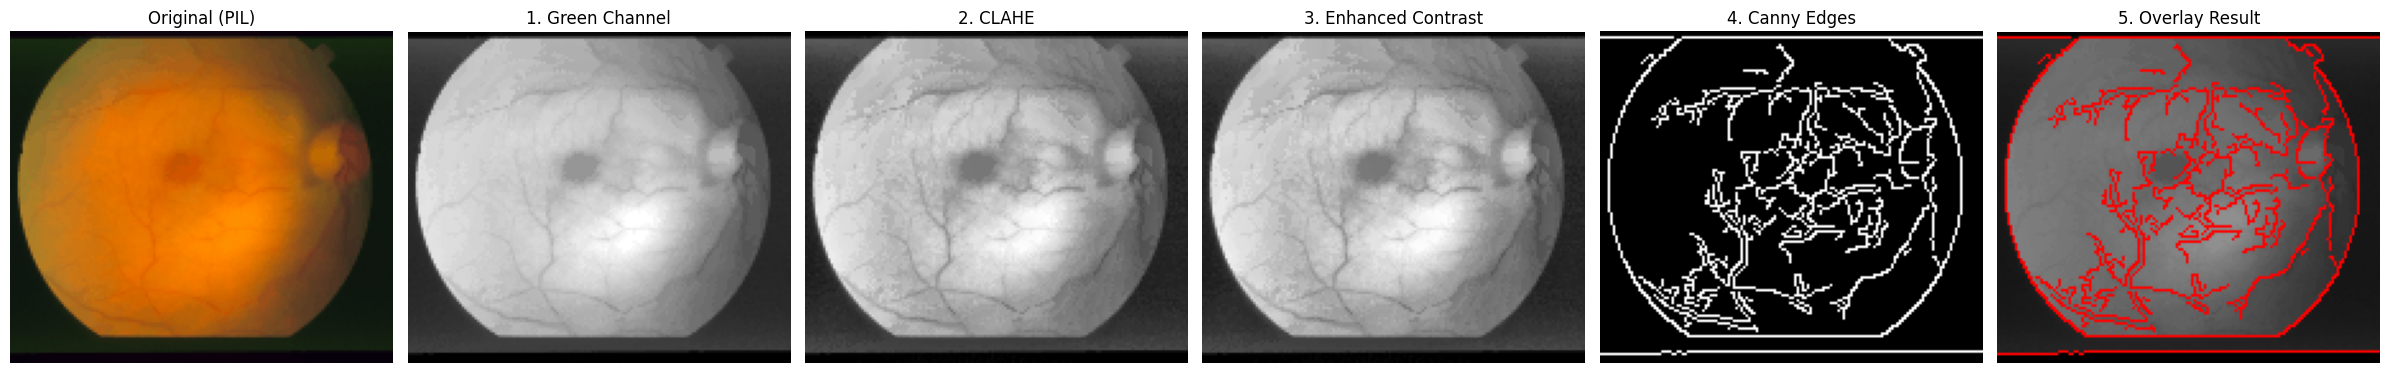

In [44]:
plt.figure(figsize=(24, 6))  # Lebar lebih besar untuk 6 subplot

# Subplot 1: Original Image
plt.subplot(1, 6, 1)
plt.imshow(pil_img)
plt.title("Original (PIL)")
plt.axis('off')

# Subplot 2: Green Channel
plt.subplot(1, 6, 2)
plt.imshow(green, cmap='gray')
plt.title("1. Green Channel")
plt.axis('off')

# Subplot 3: CLAHE
plt.subplot(1, 6, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("2. CLAHE")
plt.axis('off')

# Subplot 4: Enhanced Contrast
plt.subplot(1, 6, 4)
plt.imshow(sharpened, cmap='gray')
plt.title("3. Enhanced Contrast")
plt.axis('off')

# Subplot 5: Canny Edges
plt.subplot(1, 6, 5)
plt.imshow(canny_edges, cmap='gray')
plt.title("4. Canny Edges")
plt.axis('off')

# Subplot 6: Overlay Result
plt.subplot(1, 6, 6)
plt.imshow(overlay)
plt.title("5. Overlay Result")
plt.axis('off')

plt.tight_layout()
plt.show()


#Mempertajam Pembuluh Darah Citra Fundus pada Background Diabetic Retinopathy

<class 'numpy.ndarray'> (130, 150, 3) uint8


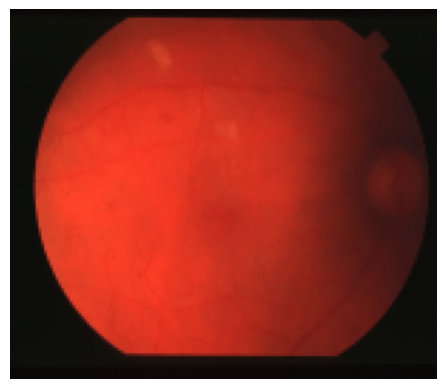

In [45]:
from PIL import Image
import numpy as np

img_pil = Image.open('citra13.jpg').convert('RGB')
img = np.array(img_pil)  # pastikan ini jadi numpy.ndarray
print(type(img), img.shape, img.dtype)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

TAHAP 1: Membuka gambar dan ekstraksi green channel...


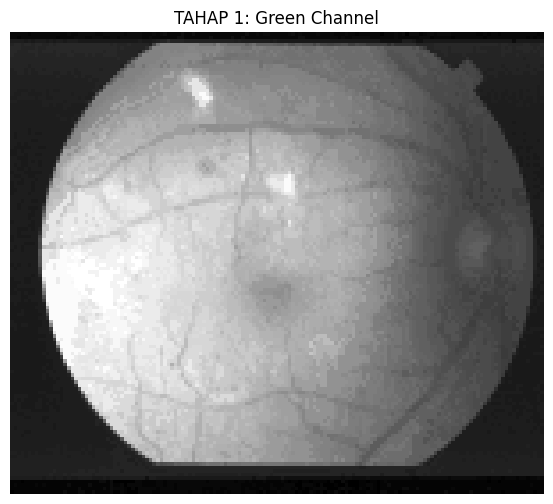

- Ukuran gambar: (130, 150)
- Range intensitas: 7 - 68
- Mean intensitas: 35.68


In [46]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("TAHAP 1: Membuka gambar dan ekstraksi green channel...")

pil_img = Image.open("citra13.jpg").convert("RGB")
img = np.array(pil_img)
green = img[:, :, 1]

# Tampilkan
plt.figure(figsize=(8, 6))
plt.imshow(green, cmap='gray')
plt.title("TAHAP 1: Green Channel")
plt.axis('off')
plt.show()

print(f"- Ukuran gambar: {green.shape}")
print(f"- Range intensitas: {green.min()} - {green.max()}")
print(f"- Mean intensitas: {green.mean():.2f}")

TAHAP 2: Menerapkan CLAHE untuk perbaikan kontras lokal...


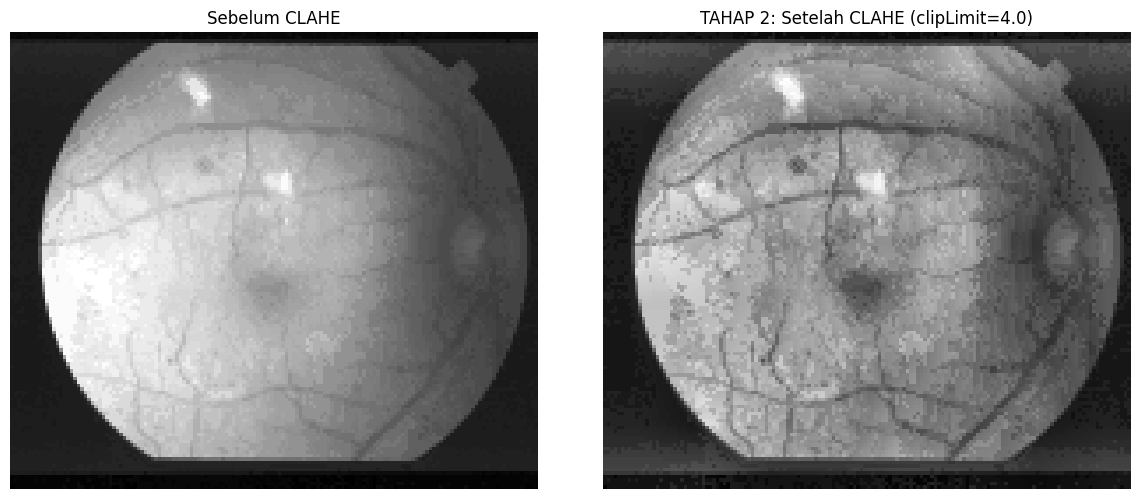

- Range intensitas setelah CLAHE: 7 - 119
- Mean intensitas setelah CLAHE: 55.08


In [68]:
print("TAHAP 2: Menerapkan CLAHE untuk perbaikan kontras lokal...")

# Tingkatkan clipLimit agar kontras lokal lebih kuat
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(green)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(green, cmap='gray')
plt.title("Sebelum CLAHE")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("TAHAP 2: Setelah CLAHE (clipLimit=4.0)")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"- Range intensitas setelah CLAHE: {clahe_img.min()} - {clahe_img.max()}")
print(f"- Mean intensitas setelah CLAHE: {clahe_img.mean():.2f}")


TAHAP 3: Menerapkan enhancement kontras global...


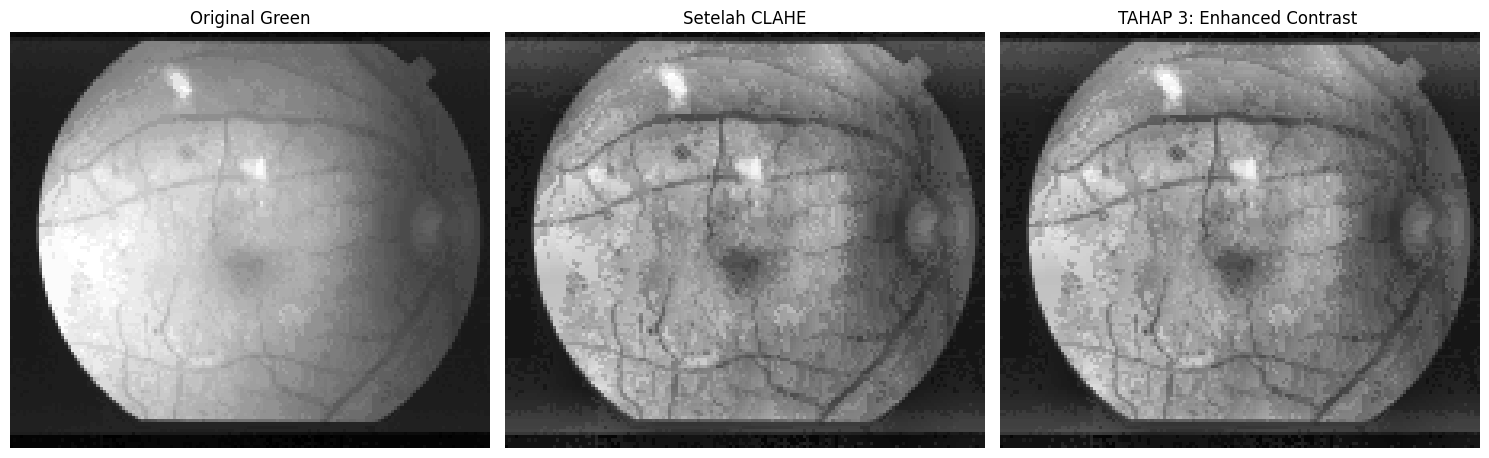

- Alpha (contrast): 2.0
- Beta (brightness): 0
- Range intensitas setelah enhancement: 14 - 238
- Mean intensitas setelah enhancement: 110.17


In [84]:
print("TAHAP 3: Menerapkan enhancement kontras global...")

# Naikkan alpha untuk memperkuat kontras
sharpened = cv2.convertScaleAbs(clahe_img, alpha=2.0, beta=0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(green, cmap='gray')
plt.title("Original Green")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("Setelah CLAHE")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("TAHAP 3: Enhanced Contrast ")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"- Alpha (contrast): 2.0")
print(f"- Beta (brightness): 0")
print(f"- Range intensitas setelah enhancement: {sharpened.min()} - {sharpened.max()}")
print(f"- Mean intensitas setelah enhancement: {sharpened.mean():.2f}")

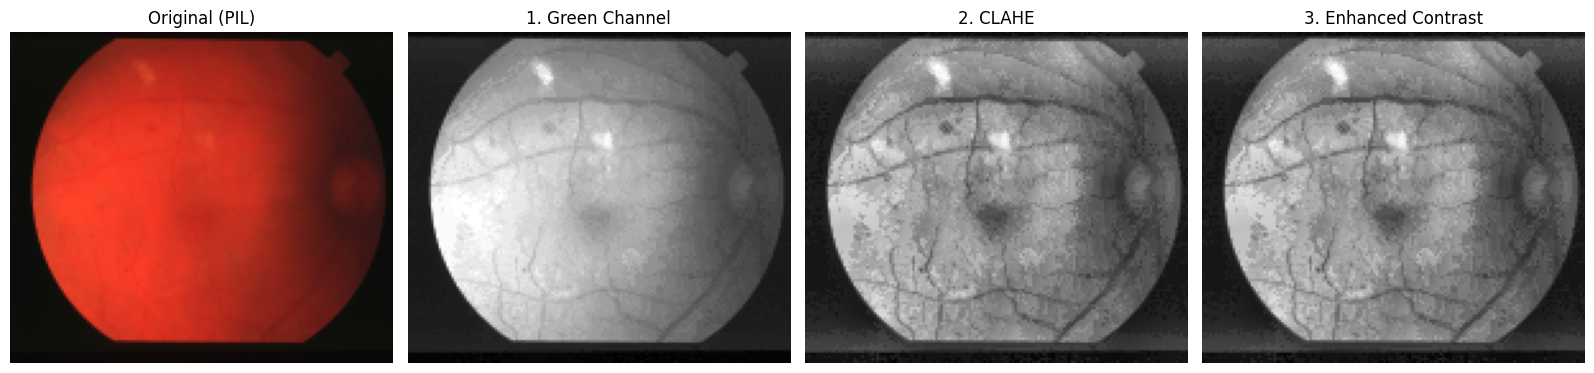

In [90]:
plt.figure(figsize=(24, 6))  # Lebar lebih besar untuk 6 subplot

# Subplot 1: Original Image
plt.subplot(1, 6, 1)
plt.imshow(pil_img)
plt.title("Original (PIL)")
plt.axis('off')

# Subplot 2: Green Channel
plt.subplot(1, 6, 2)
plt.imshow(green, cmap='gray')
plt.title("1. Green Channel")
plt.axis('off')

# Subplot 3: CLAHE
plt.subplot(1, 6, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("2. CLAHE")
plt.axis('off')

# Subplot 4: Enhanced Contrast
plt.subplot(1, 6, 4)
plt.imshow(sharpened, cmap='gray')
plt.title("3. Enhanced Contrast")
plt.axis('off')


plt.tight_layout()
plt.show()